## Toxic: LSA/NMF

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%pylab inline
# %matplotlib inline
import seaborn as sns

import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans

from sklearn.utils import shuffle

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_pickle('../data/toxictrain.pkl')
print(df.shape)
# df.head()

(159571, 17)


In [3]:
df = df[-100:]

In [4]:
df1 = df[['comment_text','toxic','severe_toxic','obscene','threat','insult','identity_hate','rating']]
X = df1['comment_text']
y = df1['toxic']
print(X.shape, y.shape)

(100,) (100,)


In [32]:
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english') # df: document frequency
dtm = vectorizer.fit_transform(X) 
print(dtm.shape)
pd.DataFrame(dtm.toarray(), index=X, columns=vectorizer.get_feature_names()).head(10)

(100, 1945)


,000,007,04,05,10,106,11,110,117,12,...,yugoslav,yugoslavism,yunshui,zaitut,zealand,zemra,zero,zho,zie,雲水
comment_text,,,,,,,,,,,,,,,,,,,,,
"""\n\n Your revert - IRC nick parameters \n\nHi, thanks for your comments when reverting me here, but I'm not sure if you understand the confusion experienced as a helper on that IRC channel. While I do see you in -helpers from time to time, these days I rarely see you in -help itself, so it's hard to grasp where your reasoning stems from. I do welcome your explanations.\n\nI'm confused about the supposed benefit of using WPhelp### over Guest###. In any given day, I see tens, if not over a hundred, instances of the WPhelp nick. The conversation often ends up something like this: WPhelp98392 asks, """"Can you help me with my draft?"""" The helper says, """"WPhelp89643: Do you understand conflict of interest?"""" Then WPhelp98392 says, """"Sorry what?"""" And the the helper must explain with !public. Sometimes the helpee will say """"I really have to look at the numbers to see who is who."""" On the contrary, I see few Guest### nicks, and while they are confusing, they are definitely not as widespread as the instances of WPhelp. These users came from the template which does not supply a nick parameter.\n\nIt takes a long time to manually squint to look for each WPhelp's number if not using autocomplete, and when using autocomplete, you really do run the risk of autocompleting the wrong nick. If you remove the nick parameter, just like the way it is in current freenode webchat, then helpees would ideally choose their own username as the nickname field, eliminating the amount of asking, """"What is your username?"""" In short, it would be easier to deal with Guest### nicknames (the few that we'd have) than the piles of confusing WPhelp usernames when everyone literally has almost the same nickname and nobody knows what's going on, with the added benefit of perhaps helpees supplying their usernames. IRC is already a confusing environment for newbies - better to make it less confusing if possible. — oh hello! """,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""\n... as evidenced by this edit. •✗/C • 14:44, 8 Mar 2008 (UTC)\n\n""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""\n\nWhat happened to the New Zealand references - I know the Indians would like to have exclusive advertising rights here however: """"godzone country"""" in a Google search will show the high relevance of the New Zealand reference. Could someone please revert the page back to the more detailed version?\nThanks.""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
", although it was extremely nit-picky,",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Yobol, as a reading of our article will show you, the section dealing with the hoax is the only section dealing with enumerating the opposition to aspartame, that is precisely the point I have been trying to get across. I see that more of an attempt at removing the strawmen from the article than grasping at straws, ymmv.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""== August 2009 == \nSurv1v4l1st (Talk|Contribs) """,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Are you talking about the move from three years ago, as seen here? If so, I wholeheartedly agree with that move. -",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""\n\nThanks for the information. I believe that the article has been edited to reflect this. Thanks! (A note?) """,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"It's not a brand new Flickr account though. And it's not rare for photographers to publish their images on their own accounts. If he is the photographer, he has full rights on the copyright of the image and is allowed to do so. Flickr doesn't work with a verification system though, so it's up for debate.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
vectorizer.get_feature_names()

['000',
 '007',
 '04',
 '05',
 '10',
 '106',
 '11',
 '110',
 '117',
 '12',
 '122',
 '129',
 '130',
 '131',
 '14',
 '152',
 '156',
 '161',
 '16th',
 '171',
 '175',
 '1787',
 '18',
 '187',
 '1892',
 '1926',
 '1934',
 '197',
 '1973',
 '198',
 '20',
 '2005',
 '2006',
 '2008',
 '2009',
 '201',
 '202',
 '203',
 '213',
 '216',
 '217',
 '22',
 '221',
 '223',
 '229',
 '232',
 '248',
 '25',
 '250',
 '2602',
 '30',
 '34',
 '35',
 '37',
 '43',
 '44',
 '45',
 '48',
 '50',
 '53',
 '57',
 '78',
 '80',
 'aami',
 'abhorant',
 'able',
 'abstain',
 'absurd',
 'abuse',
 'abusing',
 'academic',
 'academics',
 'acceptable',
 'accepted',
 'according',
 'account',
 'accounts',
 'accusation',
 'accusations',
 'acknowledged',
 'active',
 'actual',
 'add',
 'added',
 'adding',
 'additional',
 'adds',
 'admin',
 'administrator',
 'administrators',
 'admins',
 'adore',
 'advantage',
 'advertising',
 'advice',
 'aerith',
 'aethio',
 'afd',
 'afekrischalehou',
 'afekrishalehou',
 'affiliation',
 'affiliations',
 'af

In [34]:
# Fit LSA. Use algorithm = “randomized” for large datasets 
lsa = TruncatedSVD(2, algorithm = 'randomized') # from arpack
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [35]:
lsa.explained_variance_ratio_

array([ 0.33574768,  0.20091375])

In [36]:
pd.DataFrame(lsa.components_.round(5),index = ["component_1","component_2"],columns = vectorizer.get_feature_names())

,000,007,04,05,10,106,11,110,117,12,...,yugoslav,yugoslavism,yunshui,zaitut,zealand,zemra,zero,zho,zie,雲水
component_1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00003,0.00004,0.00000,0.00000,...,0.00028,0.00014,0.00014,0.01756,0.00006,0.01756,0.00000,0.01756,0.01756,0.00007
component_2,0.00003,0.00008,0.00009,0.00001,0.00002,0.00009,0.00095,0.00034,0.00002,0.00001,...,0.00280,0.00140,0.00971,-0.00077,0.00013,-0.00077,0.00009,-0.00077,-0.00077,0.00485


In [37]:
array(vectorizer.get_feature_names())

array(['000', '007', '04', ..., 'zho', 'zie', '雲水'], 
      dtype='<U24')

In [38]:
pd.DataFrame(dtm_lsa.round(5), index = X, columns = ["component_1","component_2" ])

,component_1,component_2
comment_text,,
"""\n\n Your revert - IRC nick parameters \n\nHi, thanks for your comments when reverting me here, but I'm not sure if you understand the confusion experienced as a helper on that IRC channel. While I do see you in -helpers from time to time, these days I rarely see you in -help itself, so it's hard to grasp where your reasoning stems from. I do welcome your explanations.\n\nI'm confused about the supposed benefit of using WPhelp### over Guest###. In any given day, I see tens, if not over a hundred, instances of the WPhelp nick. The conversation often ends up something like this: WPhelp98392 asks, """"Can you help me with my draft?"""" The helper says, """"WPhelp89643: Do you understand conflict of interest?"""" Then WPhelp98392 says, """"Sorry what?"""" And the the helper must explain with !public. Sometimes the helpee will say """"I really have to look at the numbers to see who is who."""" On the contrary, I see few Guest### nicks, and while they are confusing, they are definitely not as widespread as the instances of WPhelp. These users came from the template which does not supply a nick parameter.\n\nIt takes a long time to manually squint to look for each WPhelp's number if not using autocomplete, and when using autocomplete, you really do run the risk of autocompleting the wrong nick. If you remove the nick parameter, just like the way it is in current freenode webchat, then helpees would ideally choose their own username as the nickname field, eliminating the amount of asking, """"What is your username?"""" In short, it would be easier to deal with Guest### nicknames (the few that we'd have) than the piles of confusing WPhelp usernames when everyone literally has almost the same nickname and nobody knows what's going on, with the added benefit of perhaps helpees supplying their usernames. IRC is already a confusing environment for newbies - better to make it less confusing if possible. — oh hello! """,0.72767,0.68593
"""\n... as evidenced by this edit. •✗/C • 14:44, 8 Mar 2008 (UTC)\n\n""",0.08808,0.99611
"""\n\nWhat happened to the New Zealand references - I know the Indians would like to have exclusive advertising rights here however: """"godzone country"""" in a Google search will show the high relevance of the New Zealand reference. Could someone please revert the page back to the more detailed version?\nThanks.""",0.65730,0.75362
", although it was extremely nit-picky,",0.06588,0.99783
"Yobol, as a reading of our article will show you, the section dealing with the hoax is the only section dealing with enumerating the opposition to aspartame, that is precisely the point I have been trying to get across. I see that more of an attempt at removing the strawmen from the article than grasping at straws, ymmv.",0.02312,0.99973
"""== August 2009 == \nSurv1v4l1st (Talk|Contribs) """,0.04310,0.99907
"Are you talking about the move from three years ago, as seen here? If so, I wholeheartedly agree with that move. -",0.09464,0.99551
"""\n\nThanks for the information. I believe that the article has been edited to reflect this. Thanks! (A note?) """,0.02599,0.99966
"It's not a brand new Flickr account though. And it's not rare for photographers to publish their images on their own accounts. If he is the photographer, he has full rights on the copyright of the image and is allowed to do so. Flickr doesn't work with a verification system though, so it's up for debate.",0.03387,0.99943


In [13]:
[[X[i], dtm_lsa[i][0].round(5), dtm_lsa[i][1].round(5)] for i in range(len(X))]

[['"\n\n Your revert - IRC nick parameters \n\nHi, thanks for your comments when reverting me here, but I\'m not sure if you understand the confusion experienced as a helper on that IRC channel. While I do see you in -helpers from time to time, these days I rarely see you in -help itself, so it\'s hard to grasp where your reasoning stems from. I do welcome your explanations.\n\nI\'m confused about the supposed benefit of using WPhelp### over Guest###. In any given day, I see tens, if not over a hundred, instances of the WPhelp nick. The conversation often ends up something like this: WPhelp98392 asks, ""Can you help me with my draft?"" The helper says, ""WPhelp89643: Do you understand conflict of interest?"" Then WPhelp98392 says, ""Sorry what?"" And the the helper must explain with !public. Sometimes the helpee will say ""I really have to look at the numbers to see who is who."" On the contrary, I see few Guest### nicks, and while they are confusing, they are definitely not as widespr

In [14]:
xs = [w[0].round(5) for w in dtm_lsa] 
ys = [w[1].round(5) for w in dtm_lsa]
c_[xs, ys]

array([[ 0.72767,  0.68593],
       [ 0.08808,  0.99611],
       [ 0.6573 ,  0.75362],
       [-0.86733,  0.49773],
       [ 0.02312,  0.99973],
       [ 0.0431 ,  0.99907],
       [ 0.09464,  0.99551],
       [ 0.02599,  0.99966],
       [ 0.03387,  0.99943],
       [ 0.02818,  0.9996 ],
       [ 0.95094,  0.30936],
       [ 0.06027,  0.99818],
       [ 0.03445,  0.99941],
       [ 0.06548,  0.99785],
       [ 0.99985, -0.01733],
       [-0.08252,  0.99659],
       [ 0.02387,  0.99972],
       [ 0.02676,  0.99964],
       [ 0.03269,  0.99947],
       [ 0.89971,  0.43649],
       [ 0.34606,  0.93821],
       [ 0.86529,  0.50128],
       [ 0.01933,  0.99981],
       [ 0.01779,  0.99984],
       [ 0.09399,  0.99557],
       [ 0.05363,  0.99856],
       [ 0.02561,  0.99967],
       [-0.10658,  0.9943 ],
       [ 0.35116,  0.93632],
       [ 0.51539,  0.85696],
       [ 0.84853,  0.52915],
       [ 0.17552,  0.98448],
       [ 0.64168,  0.76697],
       [ 0.10992,  0.99394],
       [ 0.041

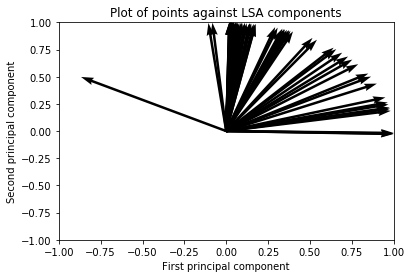

In [39]:
plt.figure()
ax = plt.gca()
ax.quiver(0,0,xs,ys,angles='xy',scale_units='xy',scale=1, linewidth = .01) # collection of arrows
# ax.quiver(0,0,xs,ys,scale=1, linewidth = .01)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA components')
plt.draw()
plt.show()

In [16]:
# Compute document similarity using LSA components
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T) 
pd.DataFrame(similarity.round(6),index=(range(len(df))), columns=(range(len(df)))).head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.747353,0.995233,-0.289730,0.702569,0.716654,0.751717,0.704605,0.710176,0.706156,...,0.919208,0.708985,0.702573,0.725274,0.716411,0.699299,0.712355,0.709148,0.710445,0.890366
1,0.747353,1.000000,0.808591,0.419399,0.997884,0.998984,0.999978,0.998066,0.998525,0.998200,...,0.948606,0.998432,0.997884,0.999467,0.998968,0.997575,0.998688,0.998445,0.998546,0.967895
2,0.995233,0.808591,1.000000,-0.195002,0.768623,0.781258,0.812452,0.770453,0.775454,0.771846,...,0.953231,0.774385,0.768627,0.788962,0.781040,0.765682,0.777407,0.774531,0.775695,0.930521
3,-0.289730,0.419399,-0.195002,1.000000,0.477539,0.459879,0.413405,0.475018,0.468068,0.473092,...,0.110560,0.469561,0.477534,0.448798,0.460188,0.481562,0.465327,0.469358,0.467731,0.177753
4,0.702569,0.997884,0.768623,0.477539,1.000000,0.999800,0.997433,0.999996,0.999942,0.999987,...,0.926021,0.999959,1.000000,0.999474,0.999807,0.999989,0.999904,0.999957,0.999938,0.949503
5,0.716654,0.998984,0.781258,0.459879,0.999800,1.000000,0.998665,0.999853,0.999957,0.999888,...,0.933382,0.999940,0.999800,0.999923,1.000000,0.999698,0.999981,0.999943,0.999961,0.955586
6,0.751717,0.999978,0.812452,0.413405,0.997433,0.998665,1.000000,0.997635,0.998145,0.997783,...,0.950671,0.998041,0.997434,0.999231,0.998647,0.997095,0.998329,0.998055,0.998169,0.969531
7,0.704605,0.998066,0.770453,0.475018,0.999996,0.999853,0.997635,1.000000,0.999969,0.999998,...,0.927099,0.999981,0.999996,0.999563,0.999859,0.999972,0.999940,0.999979,0.999966,0.950398
8,0.710176,0.998525,0.775454,0.468068,0.999942,0.999957,0.998145,0.999969,1.000000,0.999984,...,0.930024,0.999999,0.999942,0.999765,0.999960,0.999882,0.999995,0.999999,1.000000,0.952820
9,0.706156,0.998200,0.771846,0.473092,0.999987,0.999888,0.997783,0.999998,0.999984,1.000000,...,0.927917,0.999992,0.999987,0.999625,0.999894,0.999954,0.999961,0.999991,0.999982,0.951077


In [41]:
np.asmatrix(dtm_lsa)

matrix([[ 0.72767174,  0.68592553],
        [ 0.08808064,  0.99611335],
        [ 0.65730469,  0.75362494],
        [ 0.06588298,  0.99782736],
        [ 0.02312367,  0.99973261],
        [ 0.04310493,  0.99907055],
        [ 0.09464467,  0.99551112],
        [ 0.02598914,  0.99966223],
        [ 0.03386709,  0.99942635],
        [ 0.02817647,  0.99960296],
        [ 0.95094419,  0.3093625 ],
        [ 0.060272  ,  0.99818199],
        [ 0.03444977,  0.99940643],
        [ 0.0654751 ,  0.9978542 ],
        [ 0.99984977, -0.01733323],
        [-0.00996562, -0.99995034],
        [ 0.0238682 ,  0.99971511],
        [ 0.026757  ,  0.99964197],
        [ 0.03269202,  0.99946547],
        [ 0.89970797,  0.43649235],
        [ 0.34606142,  0.93821186],
        [ 0.86528789,  0.50127525],
        [ 0.01932966,  0.99981316],
        [ 0.01778887,  0.99984177],
        [ 0.0939856 ,  0.99557356],
        [ 0.05363334,  0.9985607 ],
        [ 0.02560936,  0.99967203],
        [-0.10111931,  0.994

In [17]:
from sklearn.decomposition import NMF

nmf_model = NMF(2)

dtm_nmf = nmf_model.fit_transform(dtm)
dtm_nmf = Normalizer(copy=False).fit_transform(dtm_nmf)

In [18]:
dtm.shape

(100, 1945)

In [19]:
dtm_nmf.round(2)

array([[ 0.66,  0.75],
       [ 0.05,  1.  ],
       [ 0.58,  0.81],
       [ 0.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.01,  1.  ],
       [ 0.04,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.93,  0.37],
       [ 0.02,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.02,  1.  ],
       [ 1.  ,  0.01],
       [ 0.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.86,  0.51],
       [ 0.27,  0.96],
       [ 0.82,  0.57],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.05,  1.  ],
       [ 0.02,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.  ,  0.  ],
       [ 0.28,  0.96],
       [ 0.44,  0.9 ],
       [ 0.8 ,  0.6 ],
       [ 0.12,  0.99],
       [ 0.57,  0.82],
       [ 0.06,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.06,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.09,  1.  ],
       [ 0.09,  1.  ],
       [ 0.09,  1.  ],
       [ 0.02,  1.  ],
       [ 0.23,  0.97],
       [ 0.

In [20]:
nmf_model.components_[:,:5]

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          5.98356731e-07,   0.00000000e+00],
       [  1.92304687e-04,   5.61339201e-04,   6.14306569e-04,
          4.86352518e-05,   1.20697273e-04]])

In [21]:
np.dot(dtm_nmf,nmf_model.components_).round(2)[0,370:380]

array([ 0.  ,  0.  ,  0.  ,  0.02,  0.22,  0.  ,  0.01,  0.  ,  0.01,  0.09])

In [22]:
print(dtm)

  (0, 83)	1
  (0, 186)	1
  (0, 187)	1
  (0, 218)	2
  (0, 219)	1
  (0, 268)	2
  (0, 275)	1
  (0, 338)	1
  (0, 372)	1
  (0, 391)	1
  (0, 429)	1
  (0, 444)	1
  (0, 445)	1
  (0, 446)	4
  (0, 447)	1
  (0, 458)	1
  (0, 462)	1
  (0, 494)	1
  (0, 510)	1
  (0, 511)	1
  (0, 513)	1
  (0, 522)	1
  (0, 595)	1
  (0, 607)	1
  (0, 618)	1
  :	:
  (98, 795)	1
  (98, 864)	1
  (98, 982)	1
  (98, 1425)	1
  (98, 1448)	2
  (98, 1537)	1
  (98, 1595)	1
  (98, 1736)	1
  (98, 1747)	2
  (99, 224)	2
  (99, 232)	2
  (99, 338)	1
  (99, 432)	1
  (99, 601)	1
  (99, 794)	1
  (99, 856)	1
  (99, 896)	1
  (99, 898)	1
  (99, 941)	1
  (99, 993)	1
  (99, 1452)	1
  (99, 1525)	1
  (99, 1528)	1
  (99, 1753)	1
  (99, 1807)	1


In [46]:
# Fit LSA. Use algorithm = “randomized” for large datasets 
lsa = TruncatedSVD(6, algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
print(dtm.shape)
lsa.explained_variance_ratio_ # how much of the variance is explained by the different components

(100, 1945)


array([ 0.33574768,  0.20091375,  0.07336963,  0.03708317,  0.02943259,
        0.02706821])

In [47]:
numpy.asmatrix(dtm_lsa)

matrix([[  2.73478997e-02,   2.57789628e-02,   4.61846572e-02,
           1.22945643e-01,   7.39445682e-01,  -6.59210867e-01],
        [  6.20924378e-03,   7.02210199e-02,   4.04378197e-01,
           5.73114425e-01,   6.69979536e-01,  -2.32757393e-01],
        [  2.37348078e-01,   2.72128630e-01,   1.77626379e-01,
           6.95309223e-01,   5.95433559e-01,   8.04541292e-03],
        [ -7.35282803e-07,   2.89226387e-06,  -8.63123000e-03,
           6.54826478e-01,  -5.17242650e-01,  -5.50988046e-01],
        [  4.96304710e-03,   2.14573190e-01,   9.48830200e-01,
          -2.24831779e-01,   5.53079668e-02,  -6.83129140e-03],
        [  4.13479003e-03,   9.58346885e-02,   5.32435166e-01,
           8.33366895e-01,  -1.11914977e-01,  -1.69134995e-02],
        [  2.68695424e-03,   2.82624754e-02,   8.31691509e-02,
           2.20734542e-01,   7.03780297e-01,   6.69512106e-01],
        [  9.35594417e-03,   3.59872717e-01,   9.13211102e-01,
           1.51831504e-01,   1.96665005e-02,  -1

In [49]:
# Fit LSA. Use algorithm = “randomized” for large datasets 
lsa = TruncatedSVD(13, algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
print(dtm.shape)
lsa.explained_variance_ratio_ # how much of the variance is explained by the different components

(100, 1945)


array([ 0.33574768,  0.20091375,  0.07336963,  0.03708317,  0.02943252,
        0.02706826,  0.02604948,  0.02131838,  0.01353336,  0.01433224,
        0.01265659,  0.01142275,  0.00753639])

In [50]:
numpy.asmatrix(dtm_lsa)

matrix([[  1.38408343e-02,   1.30467917e-02,   2.33741651e-02, ...,
          -9.28036774e-03,   3.47126279e-03,  -4.84947109e-04],
        [  1.11515596e-03,   1.26114159e-02,   7.26252524e-02, ...,
          -1.27826248e-02,  -1.82017813e-01,   6.15774471e-01],
        [  9.53344414e-02,   1.09304577e-01,   7.13462844e-02, ...,
           4.09291969e-02,   1.93762316e-01,  -2.01000617e-01],
        ..., 
        [  3.93854863e-03,   1.21465909e-01,   3.86557066e-01, ...,
          -2.38902331e-01,   4.89358911e-02,  -6.83033602e-02],
        [  4.30495518e-03,   1.25622921e-01,   2.45477501e-02, ...,
           2.95323144e-01,  -2.55977082e-01,  -1.03313082e-01],
        [  3.45540821e-02,   9.69809586e-02,   1.08155004e-01, ...,
          -1.29235234e-02,  -1.94268959e-02,   8.29873397e-02]])

In [ ]:
# DOWNSAMPLING: to prevent kernel crashing
# df_t = df[df['rating']>0]
# df_nt = df[df['rating']==0]
# df_nt = shuffle(df_nt)
# df_nt = df_nt[-32000:] # 16225 with rating > 0 
# print(df_t.shape,df_nt.shape)
# df = pd.concat([df_t,df_nt])
# df_0 = df[df['rating']==0]
# df_1 = df[df['rating']>0]
# print(df.shape)

In [ ]:
# df_1 = df1[df1['rating']>0]
# df_0 = df1[df1['rating']==0]
# print(df_1.shape, df_0.shape)